In [3]:
# Trying to read huge EIA Electricity file

# import json

# data_path = "data/ELEC.ndjson"

# parsed_data = []

# with open(data_path, 'r') as file:
#     for line in file:
#         # print(line)
#         # Remove leading/trailing whitespaces and parse each line as JSON
#         for l in line:
#             data_object = json.loads(line.strip())
#             parsed_data.append(data_object)
#         break

here are the sales examples. Columns:

Month: gives you the month of the year. From 03.2018 to 11.2022
All other columns: your products sales, containing Region - Brand - Product information.

Eg. column: Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2
Split column name with strsplit(" - ") and you get:
Дальневосточный ФО  -> geographical region
AGALATES -> molecule
Agalates tabs 0.5 mg #2 -> concrete product

So if the goal is to build a hierarchy, we can build it:
Leaves: products
Parents: molecules
Parents of parents: regions

:*

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [26]:
original_df = pd.read_excel('data/Quarterly_smoothing.xlsx', index_col=0)

In [27]:
df = original_df.iloc[:, :20]

print("Shape", df.shape)
df.head()

Shape (57, 20)


,Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8,Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel susp 170 ml #1,Дальневосточный ФО - ALMONT - Almont FC tabs 10 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 4 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #98,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 10 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 25 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 50 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin tabs 4+100 mg #20,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 100 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 40 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene solution for inj 15 mg/2ml 2 ml #5 ampules,Дальневосточный ФО - AMBROBENE - Ambrobene syrup 15 mg/5ml #100 bottle
Month,,,,,,,,,,,,,,,,,,,,
2018-03-01,200,0,0,9,0,0,0,948,35,87,79,0,0,0,0,0,1038,0,1150,1081
2018-04-01,1000,0,0,9,0,0,0,1036,35,87,79,0,0,0,0,0,3219,1903,1550,9207
2018-05-01,1731,0,0,301,0,0,0,1245,93,147,18,19,0,0,0,0,4522,2220,1700,10998
2018-06-01,2090,0,0,490,0,0,0,1786,183,103,72,19,4,100,0,0,5125,2250,1050,25764
2018-07-01,1547,0,60,490,0,0,0,4131,183,103,72,19,24,100,0,0,3633,377,650,20549


### Plot signal of all drugs over time - see patterns

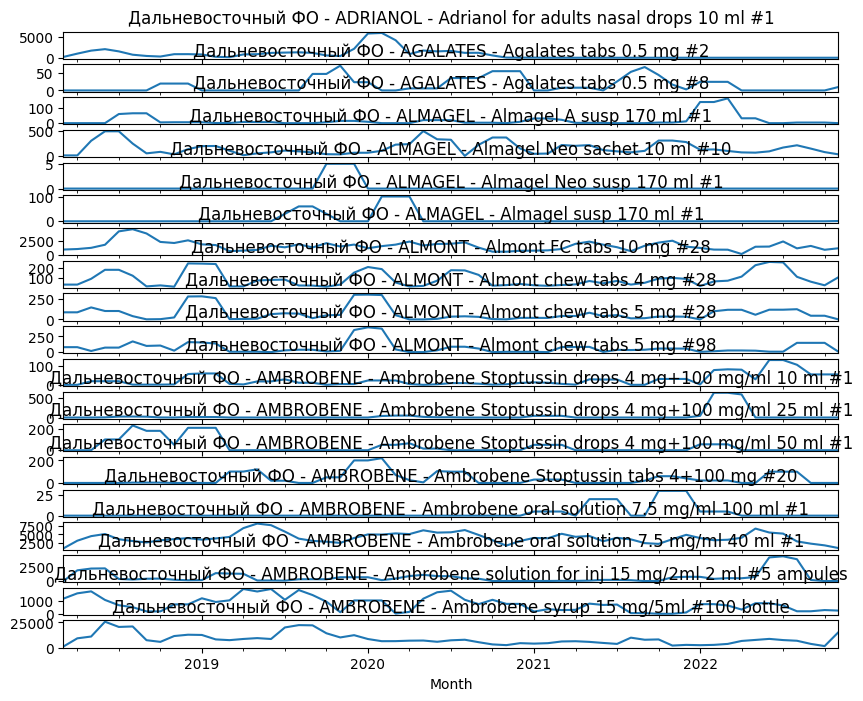

In [24]:
fig, axes = plt.subplots(len(df.columns), 1, figsize=(10, 8), sharex=True)
for i, column in enumerate(df.columns):
    df[column].plot(ax=axes[i])
    axes[i].set_title(column)
    # axes[i].set_ylabel('Value')

## Correlation between the months

<font color="green">Pairwise using pandas.corr()</font>

In [29]:
dfT = original_df.T
dfT.shape

(2254, 57)

<font color="cyan">I see a lot of correlated dates</font>

In [33]:
dfT.corr().head()

Month,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,...,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01
Month,,,,,,,,,,,,,,,,,,,,,
2018-03-01,1.000000,0.688540,0.650474,0.458229,0.454746,0.527652,0.595043,0.532067,0.525809,0.504377,...,0.424621,0.449517,0.400025,0.399246,0.415794,0.475518,0.404347,0.403712,0.459449,0.553518
2018-04-01,0.688540,1.000000,0.924927,0.819634,0.506495,0.530967,0.579802,0.504569,0.536921,0.539555,...,0.562716,0.794682,0.612139,0.558681,0.442073,0.455390,0.372633,0.391830,0.478934,0.542869
2018-05-01,0.650474,0.924927,1.000000,0.914240,0.683922,0.592704,0.635526,0.556895,0.605321,0.609775,...,0.631696,0.794537,0.628384,0.595824,0.501021,0.530340,0.431417,0.439186,0.538673,0.586414
2018-06-01,0.458229,0.819634,0.914240,1.000000,0.818568,0.716749,0.606773,0.514092,0.590874,0.673033,...,0.670830,0.798325,0.656397,0.652878,0.533962,0.581448,0.514407,0.545897,0.612168,0.579522
2018-07-01,0.454746,0.506495,0.683922,0.818568,1.000000,0.897403,0.761972,0.525435,0.620760,0.744316,...,0.644925,0.603295,0.592414,0.652076,0.620347,0.656065,0.591614,0.640368,0.701299,0.638724


Laura, have you seen this, some interesting pattens here.

Beware: colorbar in range $[0.4, 1]$, so <font color="red">red squares</font> are overemphasized. TODO Ariel fix this to [-1,1]

<font color='pink'>So all months are positively correlated with each other?</font>

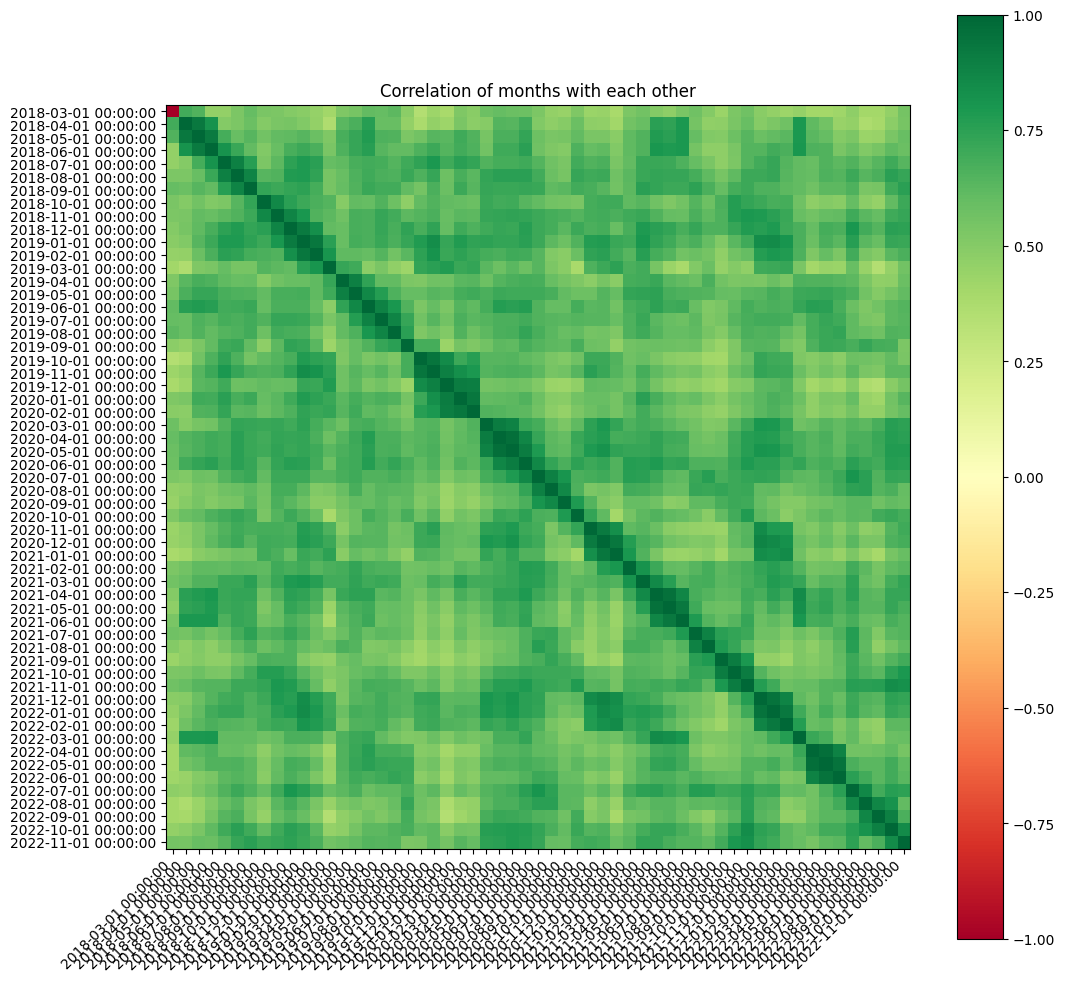

In [45]:
plt.figure(figsize=(12, 12))

monthsCorr = dfT.corr()

monthsCorr.iloc[0,0] = -1 # To plot colorbar in correct range

plt.imshow(monthsCorr, cmap='RdYlGn')#, interpolation='nearest')

num_columns = len(dfT.columns)
plt.xticks(range(num_columns), dfT.columns, rotation=45, ha='right')
plt.yticks(range(num_columns), dfT.columns)

plt.title('Correlation of months with each other')

plt.colorbar()#extend='min')

Note I added $[0,0] = -1$ for colorbar to plot the correct range. <font color='gold'>TODO fix this more elegantly</font>

### Histogram of correlations (at lag=0)

Getting just upper-diagonal of matrix (without diagonal, which is =1)

(array([3.90000e+01, 2.65000e+02, 9.77000e+02, 3.55900e+03, 1.19370e+04,
        3.68460e+04, 1.01799e+05, 2.26698e+05, 3.79568e+05, 3.92950e+05,
        2.91416e+05, 2.50825e+05, 2.09519e+05, 1.67777e+05, 1.29506e+05,
        9.50180e+04, 6.63540e+04, 4.43680e+04, 2.76300e+04, 1.67330e+04,
        8.70200e+03, 4.46000e+03, 2.54100e+03, 1.41000e+03, 1.07900e+03]),
 array([-0.71494449, -0.64634671, -0.57774893, -0.50915115, -0.44055337,
        -0.37195559, -0.30335781, -0.23476003, -0.16616226, -0.09756448,
        -0.0289667 ,  0.03963108,  0.10822886,  0.17682664,  0.24542442,
         0.3140222 ,  0.38261998,  0.45121776,  0.51981554,  0.58841332,
         0.6570111 ,  0.72560888,  0.79420666,  0.86280444,  0.93140222,
         1.        ]),
 <BarContainer object of 25 artists>)

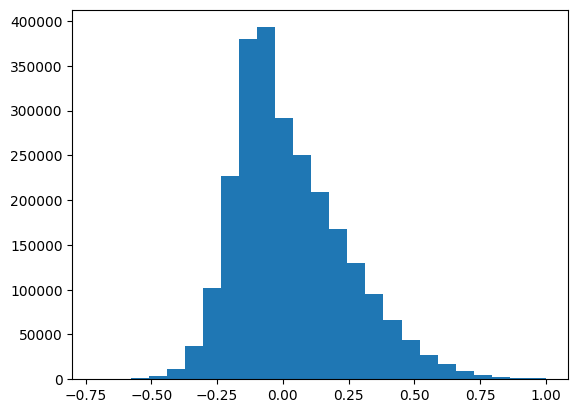

In [77]:
lower_diag_corr = []

corr_arr = np.array(original_df.corr())

for i in range(corr_arr.shape[0]):
    for j in range(i):
        lower_diag_corr.append(corr_arr[i,j])

plt.hist(lower_diag_corr, bins=25)

<font color='turquoise'>So most drugs are in $[-.25, .25], and quite a lot are more correlated than that!</font>

In [42]:
print("Min: ", monthsCorr.min(axis=None)) # Both axes
print("Max: ", monthsCorr.max(axis=None))

Min:  0.3461431065759444
Max:  1.0


Дальневосточный ФО - ALMAGEL - Almagel sachet 10 ml #10 is full of 0-s. <font color='orange'> removing all columns that are fully 0 </font>

In [8]:
def get_zero_columns(df):
    zero_columns_mask = (df == 0).all()
    zero_columns = df.columns[zero_columns_mask]

    return zero_columns

def remove_zero_columns(df):
    zero_columns = get_zero_columns(df)

    print(f"Removing {len(zero_columns)} columns with all zeros")

    df_without_zero_columns = df.drop(columns=zero_columns)

    return df_without_zero_columns

In [9]:
get_zero_columns(df)

Index(['Дальневосточный ФО - ALMAGEL - Almagel sachet 10 ml #10'], dtype='object')

In [10]:
df = remove_zero_columns(df)

Removing 1 columns with all zeros


In [11]:
correlation_results = df.corr()
correlation_results.head(5)

,Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8,Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel susp 170 ml #1,Дальневосточный ФО - ALMONT - Almont FC tabs 10 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 4 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #98,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 10 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 25 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 50 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin tabs 4+100 mg #20,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 100 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 40 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene solution for inj 15 mg/2ml 2 ml #5 ampules,Дальневосточный ФО - AMBROBENE - Ambrobene syrup 15 mg/5ml #100 bottle
Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1,1.000000,-0.109353,-0.154337,0.102190,0.045741,0.523890,0.106018,0.279303,0.493383,0.617476,-0.188798,-0.122880,0.030896,0.586774,-0.256264,0.323436,-0.014880,0.310582,0.240708
Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2,-0.109353,1.000000,0.005038,-0.017640,0.369342,-0.085731,-0.162789,-0.208054,-0.200239,-0.112437,-0.293043,-0.012984,-0.228964,-0.040836,0.024808,-0.316324,-0.283012,-0.154895,-0.078391
Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8,-0.154337,0.005038,1.000000,-0.009920,-0.036536,-0.169566,0.075201,-0.084079,-0.037326,-0.096670,0.129383,0.689970,0.254283,-0.100433,0.012317,-0.072202,-0.096535,-0.095227,-0.143120
Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1,0.102190,-0.017640,-0.009920,1.000000,-0.214516,-0.032268,0.285173,0.149354,-0.056045,-0.073096,-0.044800,-0.093372,0.129330,-0.144362,0.180760,0.080991,0.141813,-0.007888,0.105267
Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10,0.045741,0.369342,-0.036536,-0.214516,1.000000,0.014373,0.053428,-0.070780,0.178489,0.164061,-0.170777,-0.069619,-0.129098,0.270583,-0.095238,-0.152848,-0.029590,-0.033524,0.156816


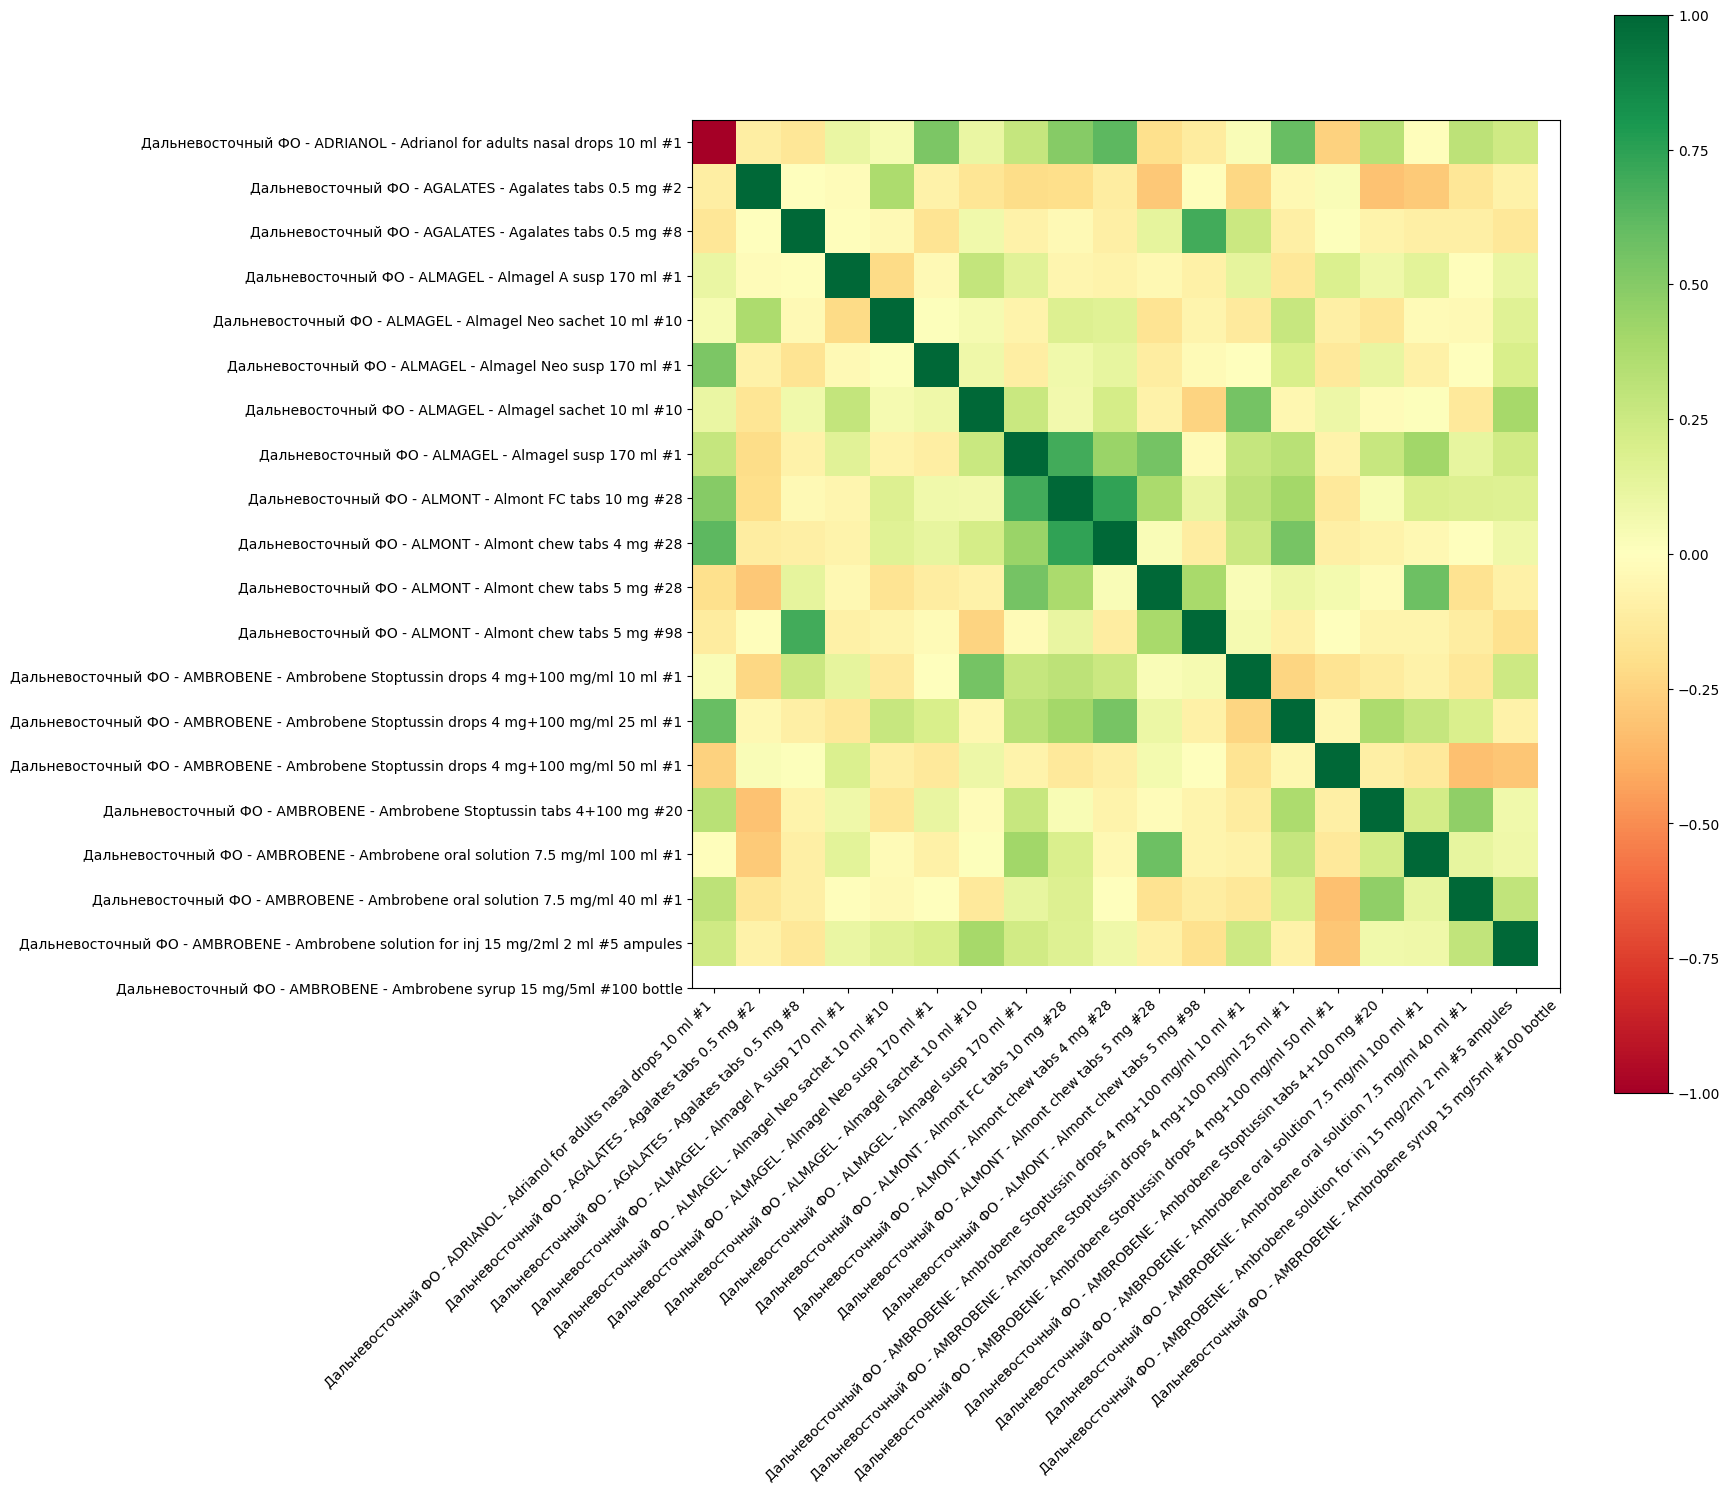

In [47]:
plt.figure(figsize=(14, 14))

correlation_results.iloc[0,0] = -1 # Again, to show colorbar correctly

plt.imshow(correlation_results, cmap='RdYlGn')#, interpolation='nearest')

num_columns = len(df.columns)
plt.xticks(range(num_columns), df.columns, rotation=45, ha='right')
plt.yticks(range(num_columns), df.columns)

plt.colorbar()

<font color='lime'>Wow, I expected drugs within same class to be much more correlated</font>

### Find the maximum correlation for each column

In [13]:
# Find the maximum correlation for each column, ignoring NaN in the diagonal
max_correlations = correlation_results.max().dropna()

# Print the results
for column, max_corr in max_correlations.items():
    other_column = correlation_results[column].idxmax()
    print(f"The maximum correlation for {column} is {max_corr:.2f} with {other_column}")


The maximum correlation for Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1 is 1.00 with Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1
The maximum correlation for Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2 is 1.00 with Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2
The maximum correlation for Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8 is 1.00 with Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8
The maximum correlation for Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1 is 1.00 with Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1
The maximum correlation for Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10 is 1.00 with Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10
The maximum correlation for Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1 is 1.00 with Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1
The maximum correlation for Дальнево

### With Lag Period

In [14]:
# Set the maximum lag level you want to consider
max_lag = 6

# Create an empty DataFrame to store the correlation results
correlation_results_w_lag = pd.DataFrame(index=df.columns, columns=df.columns)

# Calculate correlations for each pair of time series at different lag levels
for col1 in df.columns:
    for col2 in df.columns:
        max_corr = -1
        max_lag_value = 0
        
        for lag in range(0, max_lag + 1):
            # Shift the second time series by the current lag
            shifted_series = df[col2].shift(lag)
            
            # Combine the two time series into a single DataFrame
            combined_df = pd.concat([df[col1], shifted_series], axis=1).dropna()

            # print(combined_df)
            # break
            
            # Calculate correlation between the two time series
            corr_matrix = np.corrcoef(combined_df.iloc[:, 0], combined_df.iloc[:, 1])
            corr = corr_matrix[0, 1]
            
            # Update max correlation and lag if a higher correlation is found
            if corr > max_corr:
                max_corr = corr
                max_lag_value = lag
        
        correlation_results_w_lag.loc[col1, col2] = f'{max_corr:.2f} (at lag {max_lag_value})'

# correlation_results_w_lag


## Scikit-hts

<font color="red">This package is not maintained. Cannot use with any model</font>

<font color="orange">I can bring it up to date if no alternative</font>

In [15]:
# Add Totals column
# TODO this is wrong. Total needs to be by first-order in hierarchy?
# https://github.com/carlomazzaferro/scikit-hts-examples/blob/master/notebooks/visnights.ipynb
# df['total'] = df.sum(axis=1)


# Split the column names into components - this is the Hierarchy
columns_split = [col.split(' - ') for col in df.columns]
columns_split[:10]

[['Дальневосточный ФО',
  'ADRIANOL',
  'Adrianol for adults nasal drops 10 ml #1'],
 ['Дальневосточный ФО', 'AGALATES', 'Agalates tabs 0.5 mg #2'],
 ['Дальневосточный ФО', 'AGALATES', 'Agalates tabs 0.5 mg #8'],
 ['Дальневосточный ФО', 'ALMAGEL', 'Almagel A susp 170 ml #1'],
 ['Дальневосточный ФО', 'ALMAGEL', 'Almagel Neo sachet 10 ml #10'],
 ['Дальневосточный ФО', 'ALMAGEL', 'Almagel Neo susp 170 ml #1'],
 ['Дальневосточный ФО', 'ALMAGEL', 'Almagel susp 170 ml #1'],
 ['Дальневосточный ФО', 'ALMONT', 'Almont FC tabs 10 mg #28'],
 ['Дальневосточный ФО', 'ALMONT', 'Almont chew tabs 4 mg #28'],
 ['Дальневосточный ФО', 'ALMONT', 'Almont chew tabs 5 mg #28']]

In [16]:
# Get the unique categories at each level of the hierarchy
hierarchy_nodes = [ set([col[i] for col in columns_split]) for i in range(0, len(columns_split[0]))]
hierarchy_nodes

[{'Дальневосточный ФО'},
 {'ADRIANOL', 'AGALATES', 'ALMAGEL', 'ALMONT', 'AMBROBENE'},
 {'Adrianol for adults nasal drops 10 ml #1',
  'Agalates tabs 0.5 mg #2',
  'Agalates tabs 0.5 mg #8',
  'Almagel A susp 170 ml #1',
  'Almagel Neo sachet 10 ml #10',
  'Almagel Neo susp 170 ml #1',
  'Almagel susp 170 ml #1',
  'Almont FC tabs 10 mg #28',
  'Almont chew tabs 4 mg #28',
  'Almont chew tabs 5 mg #28',
  'Almont chew tabs 5 mg #98',
  'Ambrobene Stoptussin drops 4 mg+100 mg/ml 10 ml #1',
  'Ambrobene Stoptussin drops 4 mg+100 mg/ml 25 ml #1',
  'Ambrobene Stoptussin drops 4 mg+100 mg/ml 50 ml #1',
  'Ambrobene Stoptussin tabs 4+100 mg #20',
  'Ambrobene oral solution 7.5 mg/ml 100 ml #1',
  'Ambrobene oral solution 7.5 mg/ml 40 ml #1',
  'Ambrobene solution for inj 15 mg/2ml 2 ml #5 ampules',
  'Ambrobene syrup 15 mg/5ml #100 bottle'}]

GPT-4 output looks perfect compared to this https://github.com/carlomazzaferro/scikit-hts-examples/blob/master/notebooks/visnights.ipynb

In [17]:
# Beware, chatgpt below :P
aggregated_df = pd.DataFrame()

# Split the columns into hierarchical levels by '-'
columns_split = [col.split(' - ') for col in df.columns]

# Get the unique top-level classes (regions)
regions = list(set([col[0] for col in columns_split if len(col) > 1]))

# AFAIK, HTS needs a 'total' column for each level in the hierarchy. I believe all tree nodes except bottom-most
# Create a dictionary to represent the hierarchy, starting with 'total'
hierarchy = {'total': regions}

# Iterate through regions: Дальневосточный ФО
for region in regions:
    # Drug Categories - 'ADRIANOL', 'AGALATES', 'ALMAGEL', 'ALMONT', 'AMBROBENE'
    categories = list(set([col[1] for col in columns_split if len(col) > 1 and col[0] == region]))
    region_key = region
    hierarchy[region_key] = [f'{region} - {category}' for category in categories]

    # Aggregate at the region level
    region_columns = [col for col in df.columns if col.startswith(f'{region} - ')]
    aggregated_df[region_key] = df[region_columns].sum(axis=1)

    # Iterate through Drug categories
    for category in categories:
        category_key = f'{region} - {category}'
        products = [col for col in df.columns if col.startswith(f'{region} - {category} - ')]
        hierarchy[category_key] = products

        # Aggregate at the category level
        category_columns = [col for col in df.columns if col.startswith(f'{region} - {category} - ')]
        aggregated_df[category_key] = df[category_columns].sum(axis=1)

# Concatenate the aggregated columns with the original DataFrame
df_with_aggregates = pd.concat([df, aggregated_df], axis=1)

# Add the "total" column across all columns
df_with_aggregates['total'] = df_with_aggregates.sum(axis=1)


print("hierarchy: ", hierarchy)
df_with_aggregates.head()


hierarchy:  {'total': ['Дальневосточный ФО'], 'Дальневосточный ФО': ['Дальневосточный ФО - ALMONT', 'Дальневосточный ФО - ALMAGEL', 'Дальневосточный ФО - AMBROBENE', 'Дальневосточный ФО - AGALATES', 'Дальневосточный ФО - ADRIANOL'], 'Дальневосточный ФО - ALMONT': ['Дальневосточный ФО - ALMONT - Almont FC tabs 10 mg #28', 'Дальневосточный ФО - ALMONT - Almont chew tabs 4 mg #28', 'Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #28', 'Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #98'], 'Дальневосточный ФО - ALMAGEL': ['Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1', 'Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10', 'Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1', 'Дальневосточный ФО - ALMAGEL - Almagel susp 170 ml #1'], 'Дальневосточный ФО - AMBROBENE': ['Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 10 ml #1', 'Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 25 ml #1', 'Дальневосточный

,Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8,Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel susp 170 ml #1,Дальневосточный ФО - ALMONT - Almont FC tabs 10 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 4 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #28,...,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 40 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene solution for inj 15 mg/2ml 2 ml #5 ampules,Дальневосточный ФО - AMBROBENE - Ambrobene syrup 15 mg/5ml #100 bottle,Дальневосточный ФО,Дальневосточный ФО - ALMONT,Дальневосточный ФО - ALMAGEL,Дальневосточный ФО - AMBROBENE,Дальневосточный ФО - AGALATES,Дальневосточный ФО - ADRIANOL,total
Month,,,,,,,,,,,,,,,,,,,,,
2018-03-01,200,0,0,9,0,0,948,35,87,79,...,0,1150,1081,4627,201,957,3269,0,200,13881
2018-04-01,1000,0,0,9,0,0,1036,35,87,79,...,1903,1550,9207,18125,201,1045,15879,0,1000,54375
2018-05-01,1731,0,0,301,0,0,1245,93,147,18,...,2220,1700,10998,22994,277,1546,19440,0,1731,68982
2018-06-01,2090,0,0,490,0,0,1786,183,103,72,...,2250,1050,25764,39036,377,2276,34293,0,2090,117108
2018-07-01,1547,0,60,490,0,0,4131,183,103,72,...,377,650,20549,31938,377,4621,25333,60,1547,95814


In [18]:
from hts import HTSRegressor

# No model choice seems to work - you cannot install them via pip
model = HTSRegressor()#model='auto_arima', revision_method='BU')
model = model.fit(df_with_aggregates, hierarchy)

Fitting models:   0%|          | 0/13 [00:00<?, ?it/s]prophet model requires fbprophet to work. Exiting.Install it with: pip install scikit-hts[prophet]
prophet model requires fbprophet to work. Exiting.Install it with: pip install scikit-hts[prophet]
prophet model requires fbprophet to work. Exiting.Install it with: pip install scikit-hts[prophet]
Fitting models:   0%|          | 0/13 [00:01<?, ?it/s]prophet model requires fbprophet to work. Exiting.Install it with: pip install scikit-hts[prophet]

prophet model requires fbprophet to work. Exiting.Install it with: pip install scikit-hts[prophet]
prophet model requires fbprophet to work. Exiting.Install it with: pip install scikit-hts[prophet]
prophet model requires fbprophet to work. Exiting.Install it with: pip install scikit-hts[prophet]
prophet model requires fbprophet to work. Exiting.Install it with: pip install scikit-hts[prophet]
prophet model requires fbprophet to work. Exiting.Install it with: pip install scikit-hts[prophet]


AttributeError: 'NoneType' object has no attribute 'fit'